# Predicting House Prices with Machine Learning

This project is about making a <ins>machine learning model to predicti house prices</ins>. In it, I create and evaluate a number of different models that use different algorithms, and compare and constrast their various results. The data used for this project is that of the Kaggle competition [House Prices - Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data?select=train.csv).

NOTE: This notebook is an edited version of the original which I prepared for a school homework assignment. The original notebook can be found on my GitHub in my archived repository titled [Applied Machine Learning Classwork: BYU 2019](https://github.com/canyenheimuli/Applied-Machine-Learning-Classwork-BYU-2019/tree/master).

In [1]:
# Settings
import warnings
warnings.filterwarnings("ignore")

# Data Munging Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from numpy.polynomial.polynomial import polyfit
import time

# SkLearn/Other Machine Learning Packages
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import Pipeline, make_pipeline

Matplotlib is building the font cache; this may take a moment.


## Exploratory Data Analysis

First, I load the data from the competition website. I then take a look at a few rows, take a look at the summary statistics of the first and last few variables, and save the testing data IDs to submit my predictions to the website at the end of the project.

In [8]:
train_df = pd.read_csv("Data/train.csv")
test_df = pd.read_csv("Data/test.csv")
test_ID = test_df.Id
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
train_df.shape[0]

1460

In [10]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [11]:
test_df.shape[0]

1459

The full dataset is pre-split into a training and a testing set. The former set has 1,460 rows and the latter 1,459, and they each have 79 explanatory variables for the response variable which is the house's _sale price_.

Before proceeding, I do a bit more in-depth analysis to know what statistical bias and error considerations I need to make for this data. Specifically, I check which features in the data are correlated with sale price, and investigate some variables for skew, missing data, and other discrepancies.

First, let's see which variables are most correlated (Pearson Correlation Coefficient) with the sale price:

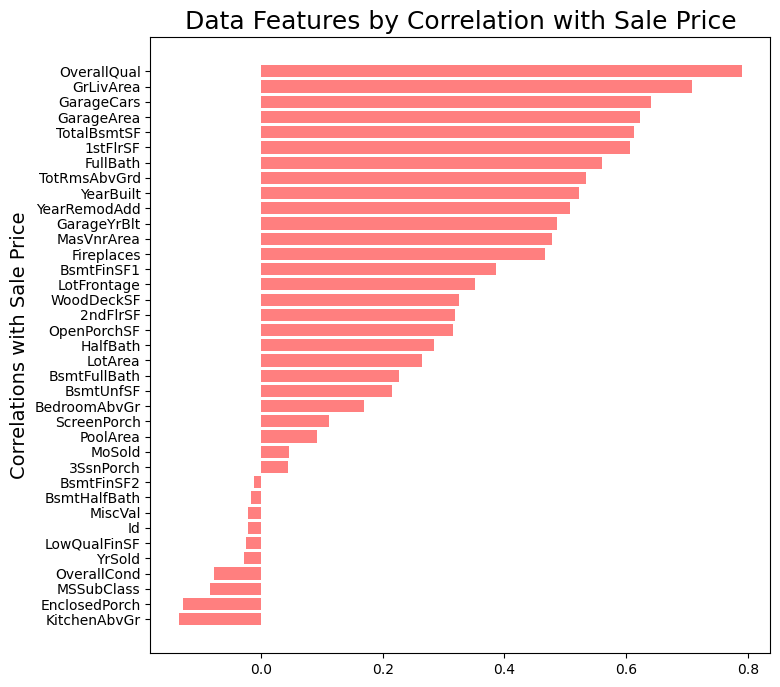

In [30]:
# Correlations
df_numeric = train_df.select_dtypes(include = 'number')
corr_train = df_numeric.corr()
corr_train = corr_train['SalePrice']
corr_train = corr_train.reset_index()
corr_train.columns = ['Feature', 'Corr_SalePrice']
corr_train = corr_train[corr_train['Feature'] != 'SalePrice']
corr_train = corr_train.sort_values('Corr_SalePrice')

# Chart
y_pos = np.arange(len(corr_train['Corr_SalePrice']))
f, ax = plt.subplots(figsize=(8,8))
plt.barh(y_pos, corr_train['Corr_SalePrice'], align='center', alpha=0.5, color='red')
plt.yticks(y_pos, corr_train['Feature'], fontsize = 10)
plt.ylabel('Correlations with Sale Price', fontsize = 14)
plt.title('Data Features by Correlation with Sale Price', fontsize = 18)
plt.show()

The variables "Overall Quality", "Above Ground Living Area", Garage-related variables, square-footage related variables, bathroom-related variables, and the "Fireplace" variable are likely to be good predictors of Sale Price.

Here's how a handful of selected variables are related to sale price, with the relationships shown as scatter plots:

In [31]:
# Scatter plot with line function
def scatter_w_SalePr(x):
    b, m = polyfit(train_df[x], train_df['SalePrice'], 1)
    f, ax = plt.subplots(figsize=(9,5))
    plt.plot(train_df[x], train_df['SalePrice'], '.')
    plt.plot(train_df[x], b + m * train_df[x], '-')
    plt.title('Scatter Plot of Sale Price with Selected Variable')
    plt.ylabel('Sale Price in USD')
    plt.show()

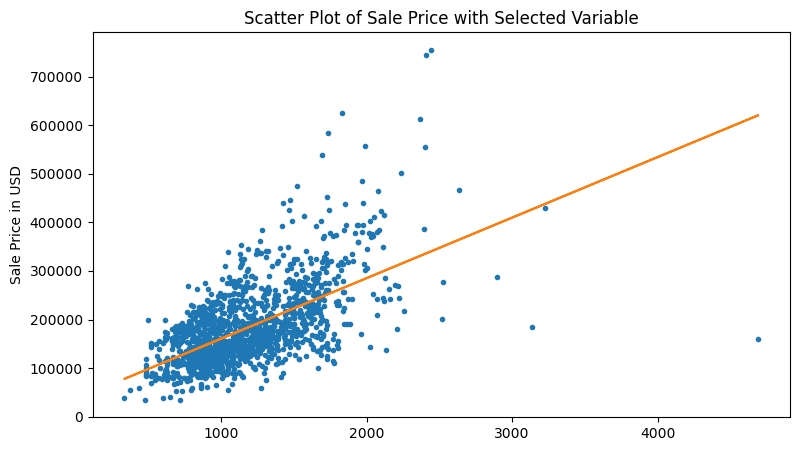

In [32]:
scatter_w_SalePr('1stFlrSF')

At least one possible outlier may be biasing this estimate (the datapoint with a first floor square footage of nearly 5,000). For the sake of simplicity, I'm going to just drop that value. The purpose of this project is to build a model with generalizability, and my planned implementation does this by simply excluding information on houses with highly uncommon sizes or other features.

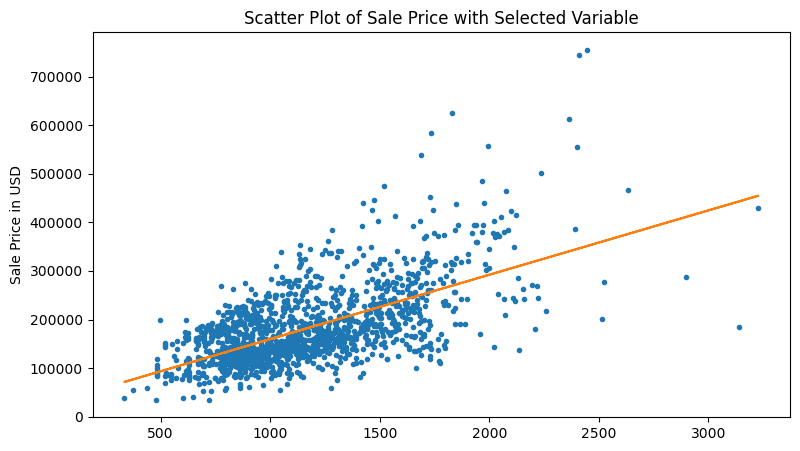

In [33]:
train_df = train_df.drop(train_df[(train_df['1stFlrSF'] > 4500)].index)
scatter_w_SalePr('1stFlrSF')

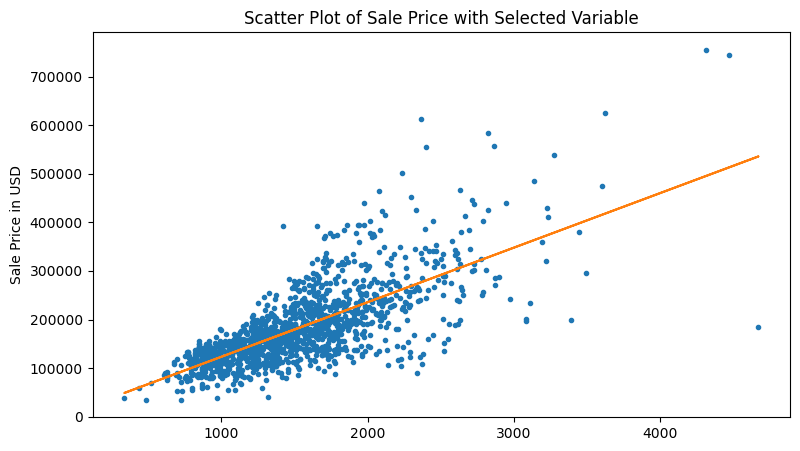

In [34]:
scatter_w_SalePr('GrLivArea')

There are likewise some possible outliers here which I remove:

In [37]:
train_df = train_df.drop(train_df[(train_df['GrLivArea'] > 4500) & (train_df['SalePrice'] < 250000)].index)

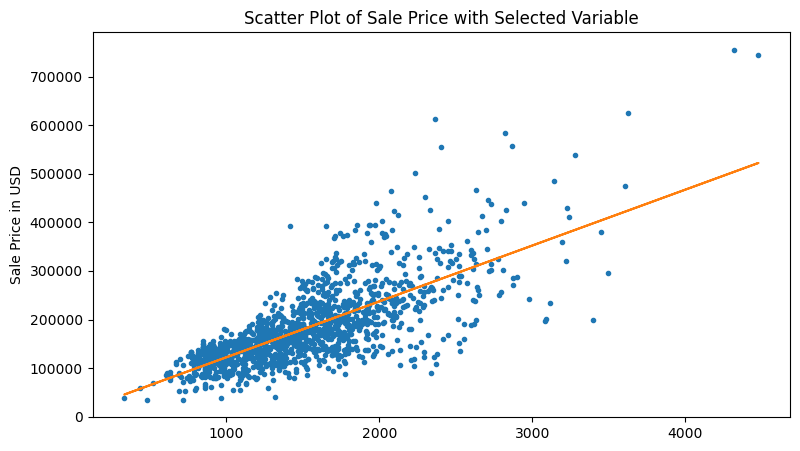

In [38]:
scatter_w_SalePr('GrLivArea')

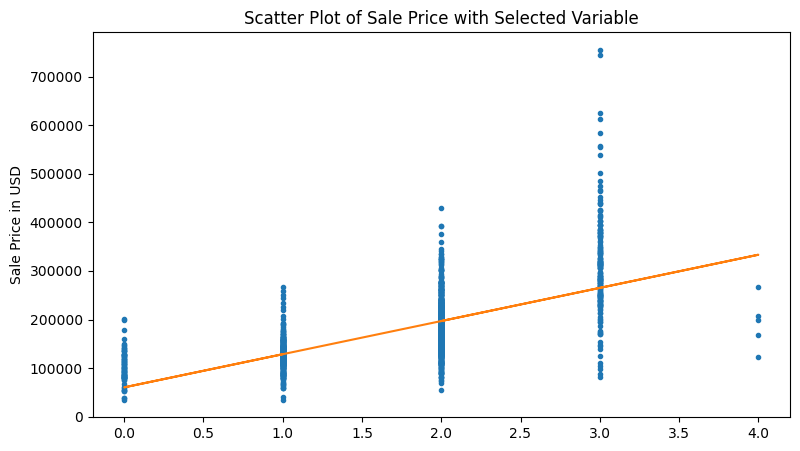

In [39]:
scatter_w_SalePr('GarageCars')

It looks like this variable might actually have a categorical relationship with sale price. That is, its different values might have a relationship with sale price values that is not necessarily "ordinal", or order-specific. Let's examine this:

<Axes: title={'center': 'SalePrice'}, xlabel='[GarageCars]'>

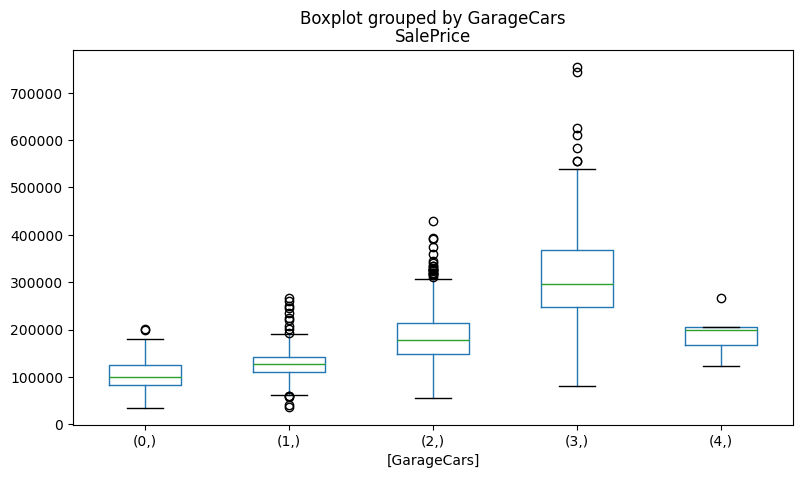

In [40]:
# Box plot
train_df.boxplot(column = ['SalePrice'], by = ['GarageCars'], fontsize = 10, 
                 grid = False, figsize = (9, 5))

This variable, along with some others such as _year sold_, _month sold_, and _house condition_ among others, is categorical, and will be processed as such in model training and in my final model.

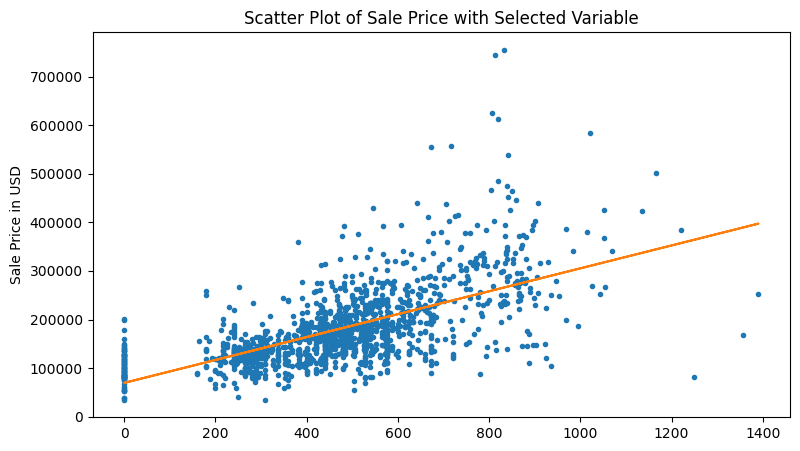

In [41]:
scatter_w_SalePr('GarageArea')

Next, here is the distribution of the response variale,  _sale price_:

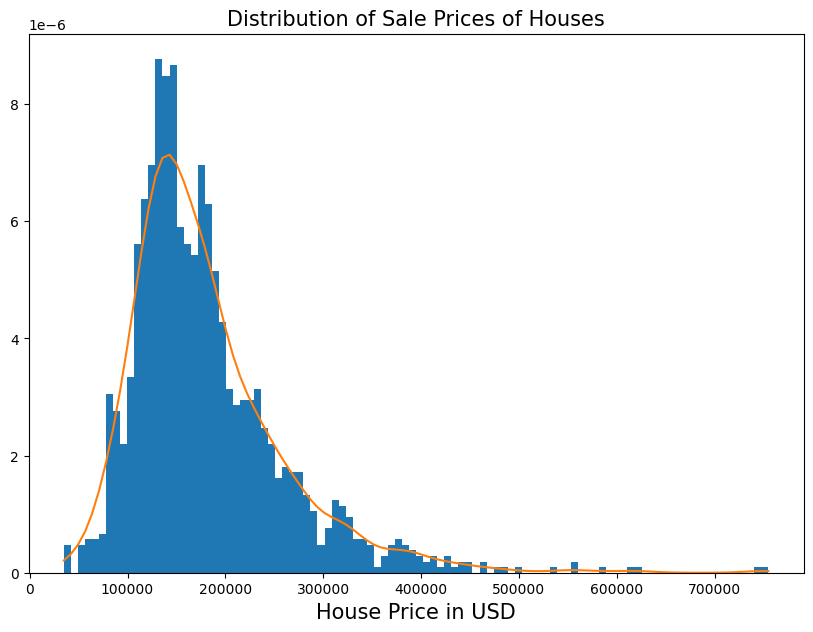

In [42]:
saleprice = train_df['SalePrice']
density = stats.gaussian_kde(saleprice)
f, ax = plt.subplots(figsize=(10,7))
n, x, _ = plt.hist(saleprice, bins=100, density=True) 
plt.plot(x, density(x))
plt.title('Distribution of Sale Prices of Houses', fontsize = 15)
plt.xlabel('House Price in USD', fontsize = 15)
plt.show()

House prices in this dataset are highly left skewed. This will eventually lead to at least some modeling problems as, even though I examine multiple models, I also use Linear Regression as a kind of baseline model. And one of the key assumptions of Least Squares regression is that the resonse variable is normally distributed.

Instead of predicting the raw house price, I'll predict the log-transformation of this variable. First, I'm going to see if the log-transformation of the variable appears more normally-distributed:

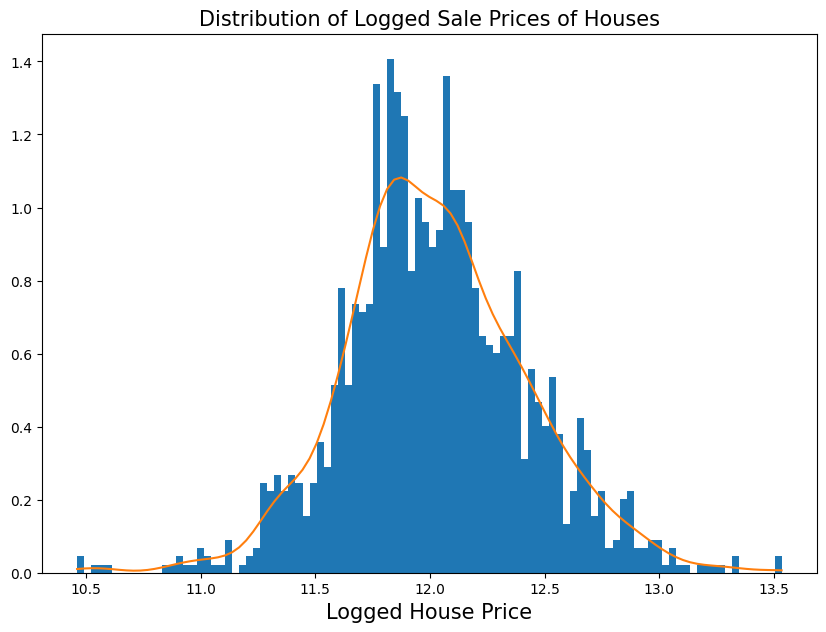

In [43]:
# Generating Log Transformation
train_df['LogSP'] = np.log1p(train_df.SalePrice)

#Re-doing the Graph
saleprice = train_df['LogSP']
density = stats.gaussian_kde(saleprice)
f, ax = plt.subplots(figsize=(10,7))
n, x, _ = plt.hist(saleprice, bins=100, density=True) 
plt.plot(x, density(x))
plt.title('Distribution of Logged Sale Prices of Houses', fontsize = 15)
plt.xlabel('Logged House Price', fontsize = 15)
plt.show()

Thankfully, this variable looks approximately normally-distributed, which will be a big help for a regression model or models.

## Data Cleaning

In this section, I go through relevant steps for cleaning the data.

This will require doing any data transformations to both the training and the testing datasets together. After combining the data for any feature engineering, imputation, or other data munging, I'll split the datasets up again before I begin model training and testing.

In [44]:
# Setting Target Variable, Combining Datasets
n_train = train_df.shape[0]
n_test = test_df.shape[0]
y_train = train_df.LogSP.values
train_df = train_df.drop('LogSP', axis=1)
full_df = pd.concat((train_df, test_df)).reset_index(drop=True)
full_df.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(full_df.shape))

all_data size is : (2917, 80)


With the following code, I display the number of missing values in for a variable by observation count:

In [45]:
full_df.isna().sum().sort_values(ascending=False)

PoolQC           2908
MiscFeature      2812
Alley            2719
Fence            2346
MasVnrType       1766
                 ... 
CentralAir          0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
SaleCondition       0
Length: 80, dtype: int64

Here are some notes about missing data:

* The _pool quality_ variable is missing in most observations in the list. It happens to be relatively rare to have a pool at all, let alone to have a pool that has demonstrable differences in quality from other pools.

* The _miscelaneous feature_ variable is likewise missing for most of the observations. These include having an elevator, a second garage, a shed, or a tennis court. I similarly don't expect these factors to be helpful in a model that I am trying to make generalizeable to a wide range of houses.

From the data description shown above, it also looked like the _utilities_ variable was the same value for almost each observation. I'll check this real quick:

In [46]:
full_df['Utilities'].value_counts()

Utilities
AllPub    2914
NoSeWa       1
Name: count, dtype: int64

Since all the data is virtually the same regarding Utilties, I'll drop this variable as well.

In [47]:
# Drop three Variables
full_df = full_df.drop(['PoolQC', 'MiscFeature', 'Utilities'], axis=1)

## Imputation (Fixing Missing Data)

Here, I describe the steps I take to deal with missing data. There is missing data in several of the variables that I will need for the model. I will look at all of these and see what will be the best option for filling in the missing value.

It looks like the _basement_ and _garage_ variables are all missing in about the same frequencies. From the documentation, it looks like the missing value just means that a house doesn't have a basement or a garage. I still want the analysis to see these observations, so I'll fill these in with "None" so that they still get calculated in categorical analysis.

In [48]:
missing_vars = ['Alley', 'Fence', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', "MasVnrType", 'MSSubClass']
# Fills in categorical variables with "None" if they equal "NA"
for col in missing_vars:
    full_df[col] = full_df[col].fillna('None')

There are also some missing values for numerical variables which I identify below. Each one's missing value (as per the data documentation) similarly signifies that the feature does not exist in the house, but it should be filled in with a "0" instead of a "None":

In [49]:
missing_numbers = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'MasVnrArea', 'GarageCars', 'GarageArea', 'GarageYrBlt']
# Fills in numerical variables with "0" if they equal "NA"
for col in missing_numbers:
    full_df[col] = full_df[col].fillna(0)

Now I'm going to deal with the tricky _lot frontage_ variable. This variable's value is equal to the linear feet of street connected to the property and it's missing for a pesky 518 of the observations in the combined dataset. I'll likewise fill this in with the variable's mean, but I'll impute the mean for the house's neighborhood. This way, each imputed value will be slightly more accurate than it would be had I just imputed the overall mean of the 2,918 observations.

In [50]:
full_df["LotFrontage"] = full_df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.mean()))

Some variables are still missing a few values. They are not numeric so I can't impute the mean. I'll just fill these in with the most common value as a simplifying assumption:

In [51]:
fill_mode = ['MSZoning', 'SaleType', 'Exterior1st', 'Electrical', 'Exterior2nd']
for col in fill_mode:
    full_df[col] = full_df[col].fillna(full_df[col].mode()[0])

Some values show that NA means that that feature in the variable is typical. We'll fill in these variables with the correct abbreviations that the documentation shows.

In [52]:
full_df["Functional"] = full_df["Functional"].fillna("Typ")
full_df['KitchenQual'] = full_df['KitchenQual'].fillna("TA")

In [53]:
#Check again for more missing values
full_df.isnull().any().sum()

np.int64(0)

## Generating New Variables/Recoding Variables

Now I'm going to begin some feature engineering. For example, one useful variable might be a "Full Square Footage" variable, equal to the sum of all the variables which record square footage on floors, decks, yards, and so on. This could be important because controlling for things separately that could be analyzed together (square footages of separate house elements as opposed to total square footage) may show to be needless and possibly confounding. This step will likewise help in the later steps of identifying the most important predictors of house price. I'll also condense a few of the numerical variables into simplified dummy variables that may make the results easier to interpret (for instance, a variable for "having a basement" or not). This section also includes "recoding" certain variables that I imagine need to be interpreted categorically rather than numerically.

In [55]:
# Total Square Footage and Total Bathrooms variables
full_df['sqfootage_tot'] = full_df['TotalBsmtSF'] + full_df['1stFlrSF'] + full_df['2ndFlrSF']
full_df['bathroom_tot'] = (full_df['FullBath'] + (0.5 * full_df['HalfBath']) + 
                           full_df['BsmtFullBath'] + (0.5 * full_df['BsmtHalfBath']))

# Dummy Variables
full_df['has_pool'] = full_df['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
full_df['has_upstairs'] = full_df['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
full_df['has_garage'] = full_df['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
full_df['has_bsmt'] = full_df['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)

There are still a few categorical variables in the dataset that are recorded numerically. These are things like _year sold_, _month sold_, and _overall condition_. I change these into categorical variables below:

In [56]:
# Changes Condition, Zoning, Cars in Garage, and Year and Month Sold to Categorical Variables
full_df['OverallCond'] = full_df['OverallCond'].astype(str)
full_df['MSSubClass'] = full_df['MSSubClass'].apply(str)
full_df['GarageCars'] = full_df['GarageCars'].astype(str)
full_df['YrSold'] = full_df['YrSold'].astype(str)
full_df['MoSold'] = full_df['MoSold'].astype(str)

It happens that there are a number of variables recorded categorically but which are probably better to be interpreted ordinally. One example is the _fireplace quality_ variable. It has distinct categorical values, but in practice they might be thought of as being on a natural scale. See the summary of this variable's values below:

In [57]:
full_df['FireplaceQu'].value_counts()

FireplaceQu
None    1420
Gd       742
TA       592
Fa        74
Po        46
Ex        43
Name: count, dtype: int64

(where "Gd" means "good", "TA" means "average", "Fa" means "fair", and "Po" means "poor")

Controlling for each separate category would be exhaustive, but probably unnecessary. Several variables have categorical values that can be thought of as ordinal even though they are not numeric. I have compiled a list of all such variables and use the following code to give them each labels that make sense in scales.

In [58]:
# Label Assignment for Ordinal Variables
ord_vars = ['Alley', 'BsmtCond','BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 
            'CentralAir', 'ExterQual', 'ExterCond', 'Fence', 'FireplaceQu', 'Functional', 
            'GarageFinish', 'GarageQual', 'GarageCond', 'HeatingQC', 'KitchenQual', 'LandSlope', 
            'LotShape', 'MSSubClass', 'MoSold', 'OverallCond', 'PavedDrive', 
            'Street', 'YrSold']

for i in ord_vars:
        lbl = LabelEncoder()
        lbl.fit(list(full_df[i].values)) 
        full_df[i] = lbl.transform(list(full_df[i].values))

The last thing to do is turn all the data into numerical values. The last remaining part of this task is doing "one-hot-encoding" (creating dummy variables for every level) for all categorical variables I've identified:

In [59]:
# Get dummy variables
full_df = pd.get_dummies(full_df)
# Get new shape of data
print(full_df.shape)

(2917, 225)


## Training, Fine-Tuning, and Implementing Models

Next, I apply a few machine learning models to use on my training data to see which one does the best. I'll select the one that appears to do the best and examine it, fine-tune it, and prepare it to make predictions on the test data. To visually analyze and illustrate the comparative training accuracy of certain models, I use this "plotting the learning curve" function from the [Scikit Learn](https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html) website. Before I select and submit the one which appears to work the best, I'll write a bit about the features that the machine learned to be the best predictors of House Prices within the dataset.

In [60]:
# Re-split data
train_complete = full_df[:n_train]
test_complete = full_df[n_train:]

The following function comes from the ScikitLearn website. It plots the learning curve of a specified model. The learning curves show a simple illustration of whether a selected model is underfitting (not learning well enough on the training data), overfitting (learning too much on the training data at the cost of generalizability), or fitting fairly well.

In [61]:
# Learning Curve Plot function
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

I also create a function that returns the scores of the models for later use.

In [62]:
def display_rmse(model, train_complete, y_train):
    scores = np.sqrt(-cross_val_score(model, train_complete, y_train, cv = 5, scoring = 'neg_mean_squared_error'))
    return scores.mean()

### Models

Here, I do a brief rundown of each of the models I plan to use. I'm going to use training and cross-validation scores on all models to see how they hold up.

Here is a list of the models I'll be trying out, and how they work:

* Linear Regression - A basic statistical analysis technique that fits a "line of best fit" (or, in this case, hyperplane of best fit) to the data by using Ordinary Least Squares as the objective function

* [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso) - A linear model that is similar to linear regression, but additionally performs variable selection along with optimization by applying a constraint or budget on the total loss of the objective function (this budget is referred to as "L1 Regularization")

* [Bayesian Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.BayesianRidge.html#sklearn.linear_model.BayesianRidge) - Fits a Bayesian ridge model and optimizes the regularization parameters lambda (precision of the weights) and alpha (precision of the noise). Uses L2 regularization and Bayesian Methods to make predictions.

* [Elastic Net](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) - Linear regression that weights L1 and L2 regularization.

* [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) - Constructs a multitude of "decision trees" by using bootstrap sampled data and outputs the class that is the mode of the classes or mean prediction (regression) of the individual trees.

* [Support Vector Regression or SVR](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html) - An algorithm that optimizes a linear (or non-linear) separator boundary of the data into component classes or ranges of the response variable using "support vectors", made up of datapoints that are close too but sufficiently far from the boundary datapoints between classes.

* [Kernel Ridge Regression](https://scikit-learn.org/stable/modules/generated/sklearn.kernel_ridge.KernelRidge.html) - This method combines ridge regression (least least squares with I2-norm regularization) with the kernel trick. It thus learns a linear function in the space induced by the respective kernel and the data. For non-linear kernels, this corresponds to a non-linear function in the original space

* [Gradient Boosting Regressor](https://scikitlearn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html) - This method is just another decision tree boosted model. It allows for the optimization of arbitrary differentiable loss functions. In each stage a regression tree is fit on the negative gradient of the given loss function.

In [63]:
def test_model(model):
    scores = display_rmse(model, train_complete, y_train)
    print(model.__class__.__name__,": RMSE =", scores)
    plot_learning_curve(model, model.__class__.__name__, train_complete, y_train, cv = 5)
    plt.show()

LinearRegression : RMSE = 0.1258924197392567


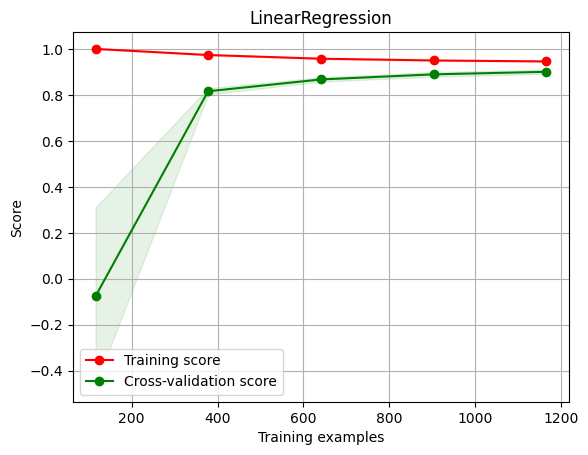

In [64]:
test_model(LinearRegression())

ElasticNet : RMSE = 0.16171758364843172


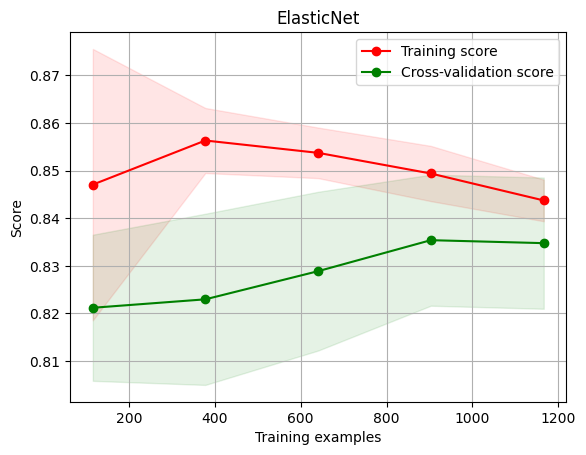

In [65]:
test_model(ElasticNet())

Lasso : RMSE = 0.1697353854560134


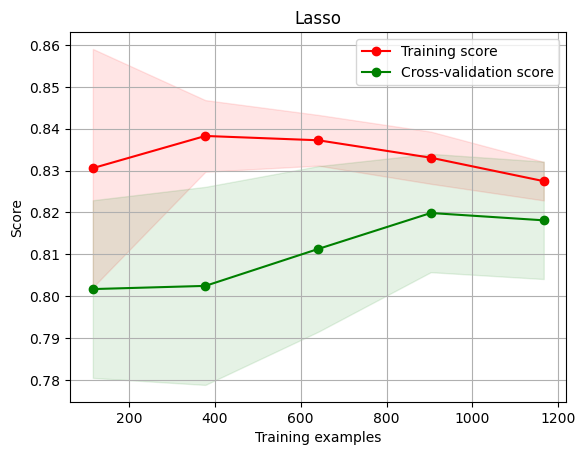

In [66]:
test_model(Lasso())

BayesianRidge : RMSE = 0.11626587470621245


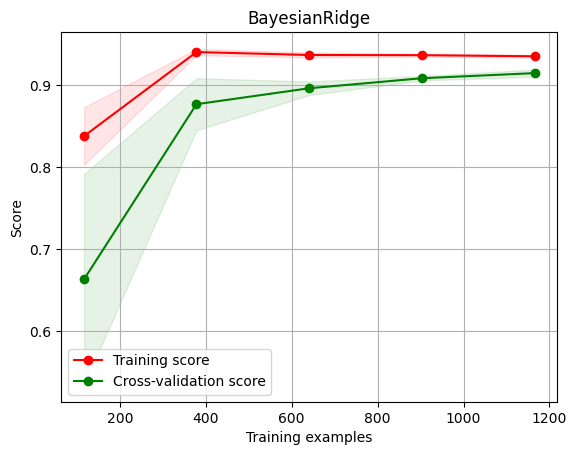

In [67]:
test_model(BayesianRidge())

RandomForestRegressor : RMSE = 0.13849896957328445


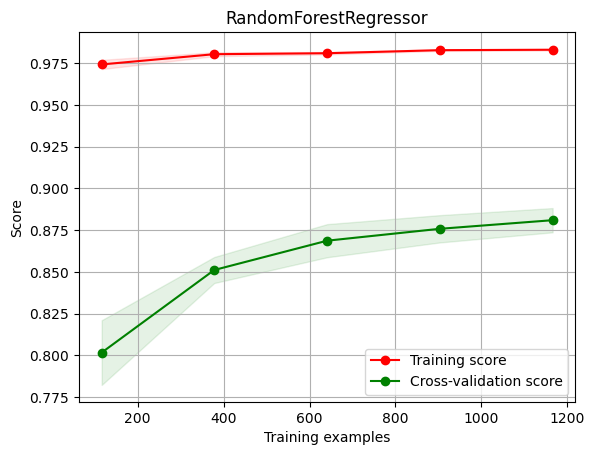

In [68]:
test_model(RandomForestRegressor())

SVR : RMSE = 0.20043830416644784


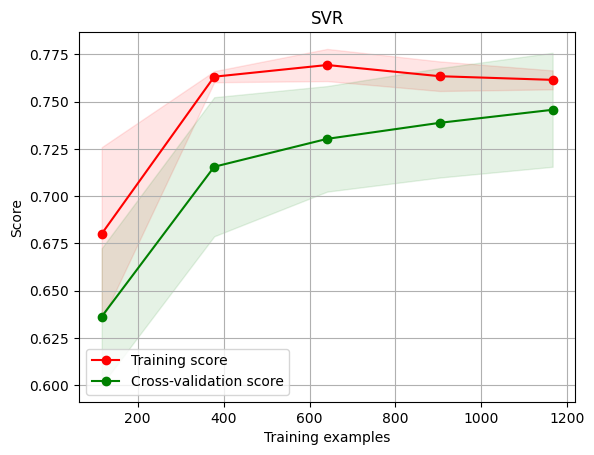

In [69]:
test_model(SVR())

KernelRidge : RMSE = 0.12209813980093591


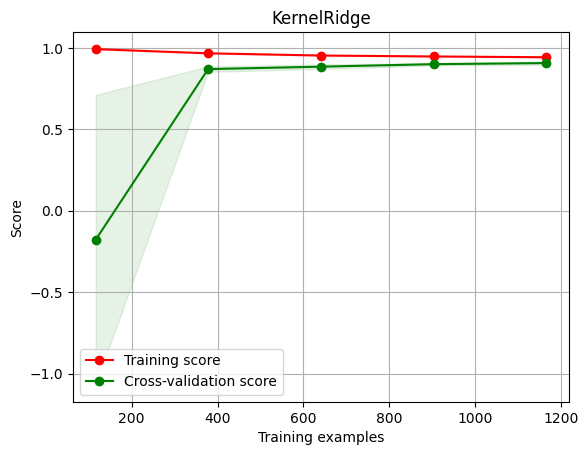

In [70]:
test_model(KernelRidge())

GradientBoostingRegressor : RMSE = 0.12091739814671949


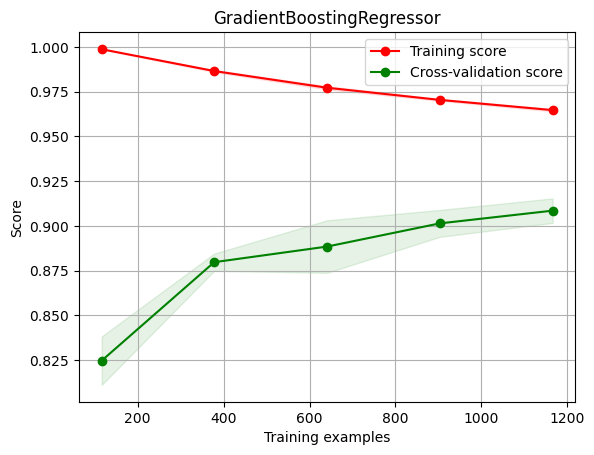

In [71]:
test_model(GradientBoostingRegressor())

### Model Evaluation

Here is a brief summary of how the various models performed, and what their performances further elucidate about the problem space:

The linear regression model was added with the intention of it being a baseline model for comparison. It served as a better baseline that I might even had hoped, as this model had RMSE scores in training (about 0.12). Additionally, its training and cross-validation scores were both around 0.9 after having used all the training examples. One well-known advantage of linear regression is that it is extremely simple and cost effective to compute. It also learns a final model that can be expressed in terms of the marginal effects of features on the response, which is a level of model transparency and explainability that is hard to attain for even slightly more complex models such as random forest models.

The SVR model did relatively poorly. Its cross-validation score came only to about 0.75 at the highest, and the model would seemingly converge at that level of accuracy if it was given more data. The ElasticNet and LASSO models did slightly better, but their training and cross-validation scores seemed to decrease as more training examples were used.

The Bayesian and Kernel Ridge as well as the tree-based boosting models all performed very well. The tree-based models especially seemed to benefit from adding more training data and may even have been able to achieve higher cross-validation scores with more data. This makes sense, as tree-based boosting models are powerful but are prone to overfitting on training data without careful model tuning.

## Model Tuning

Based on the results of the previous section, I am interested in doing hyperparameter tuning for the Bayesian and Kernel Ridge, and tree-based models. I'll then compare these updated results to linear regression one last time (linear regression is an algorithm that has no hyperparameters to tune, at least not in the implementation used above).

In [80]:
# Create steps for each model
select = SelectKBest(k = 'all')
br_steps = [('Scaler', RobustScaler()), ('model', BayesianRidge())]
kr_step = [('Scaler', RobustScaler()), ('model', KernelRidge())]
rf_steps = [('Scaler', RobustScaler()), ('model', RandomForestRegressor())]
gb_steps = [('Scaler', RobustScaler()), ('model', GradientBoostingRegressor(alpha = .0005))]

# Pipelines
br_pipe = Pipeline(br_steps)
kr_pipe = Pipeline(kr_step)
rf_pipe = Pipeline(rf_steps)
gb_pipe = Pipeline(gb_steps)

In [89]:
#Set up parameters for each pipeline to search through
params = {
    'br' : {'model__max_iter': [100, 300, 500],
            'model__tol': [1e-3, 1e-4, 1e-5],
            'model__alpha_1': [1e-6, 1e-5, 1e-4],
            'model__alpha_2': [1e-6, 1e-5, 1e-4],
            'model__lambda_1': [1e-6, 1e-5, 1e-4],
            'model__lambda_2': [1e-6, 1e-5, 1e-4]},
    'kr' : {'model__alpha': [0.1, 1, 10],
            'model__kernel': ['linear', 'rbf', 'poly'],
            'model__gamma': [0.1, 1, 10]},
    'rf' : {'model__n_estimators': [100, 200, 300, 500],
            'model__max_depth': [None, 10, 20, 30],
            'model__min_samples_split': [2, 5, 10],
            'model__min_samples_leaf': [1, 2, 4],
            'model__max_features': ['sqrt', 'log2', None]},
    'gb' : {'model__learning_rate' : [1, 0.5, 0.25, 0.1, 0.05, 0.01],
            'model__n_estimators' : np.arange(500, 3000, 200),
            'model__min_samples_leaf' : np.linspace(0.1, 0.5, 5, endpoint=True),
            'model__min_samples_split' : np.linspace(0.1, 1.0, 10, endpoint=True)}
}

The code above sets up some relevant hyperparameters that the search can look through when doing the tuning. The code below executes the search and shows the improvements in RMSE and the Learning Curve:

In [82]:
# Function for getting the best hyperparameters for each model
def tune_parameters(pipe, train_complete, y_train, params, n_iter, base_model):
    orig_score = display_rmse(base_model, train_complete, y_train)
    model = RandomizedSearchCV(pipe, param_distributions = params, n_iter = n_iter, cv = 5, scoring = 'neg_mean_squared_error')
    start_time = time.time()
    model.fit(train_complete,y_train)
    print("Best Hyperparameters for %s  \n" % (pipe.named_steps.model.__class__.__name__))
    print(model.best_params_, '\n')
    model = model.best_estimator_
    new_score = display_rmse(model, train_complete, y_train)
    print("Original RMSE: %s \n" %(orig_score))
    print("Improved RMSE: %s \n" %(new_score))
    print("NEW LEARNING CURVE:")
    plot_learning_curve(model, pipe.named_steps.model.__class__.__name__, train_complete, y_train, cv = 5)
    plt.show()
    return model

Best Hyperparameters for BayesianRidge  

{'model__tol': 0.0001, 'model__max_iter': 300, 'model__lambda_2': 1e-06, 'model__lambda_1': 1e-06, 'model__alpha_2': 0.0001, 'model__alpha_1': 0.0001} 

Original RMSE: 0.11626587470621245 

Improved RMSE: 0.11593429272426284 

NEW LEARNING CURVE:


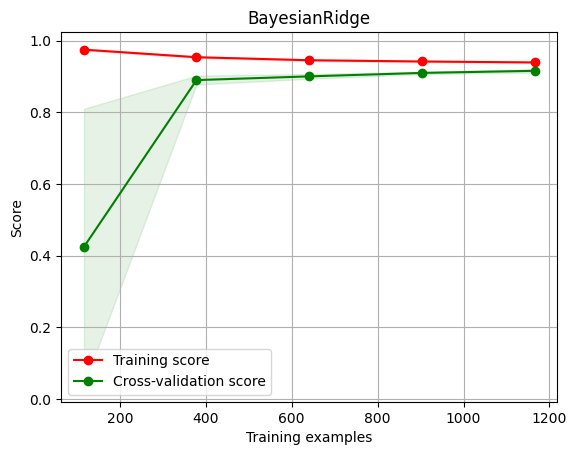

In [85]:
br_tuned = tune_parameters(br_pipe, train_complete, y_train, 
                           params['br'], 10, BayesianRidge())

Best Hyperparameters for KernelRidge  

{'model__kernel': 'linear', 'model__gamma': 0.1, 'model__alpha': 0.1} 

Original RMSE: 0.12209813980093591 

Improved RMSE: 0.17310712409046264 

NEW LEARNING CURVE:


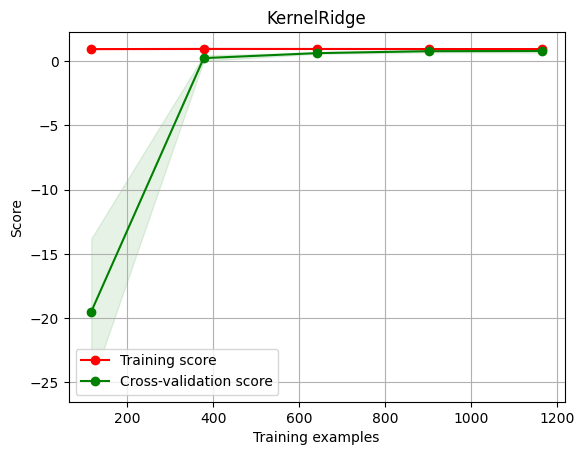

In [86]:
kr_tuned = tune_parameters(kr_pipe, train_complete, y_train, 
                           params['kr'], 10, KernelRidge())

Best Hyperparameters for RandomForestRegressor  

{'model__n_estimators': 300, 'model__min_samples_split': 5, 'model__min_samples_leaf': 2, 'model__max_features': None, 'model__max_depth': 20} 

Original RMSE: 0.1372862828912865 

Improved RMSE: 0.13776002304367552 

NEW LEARNING CURVE:


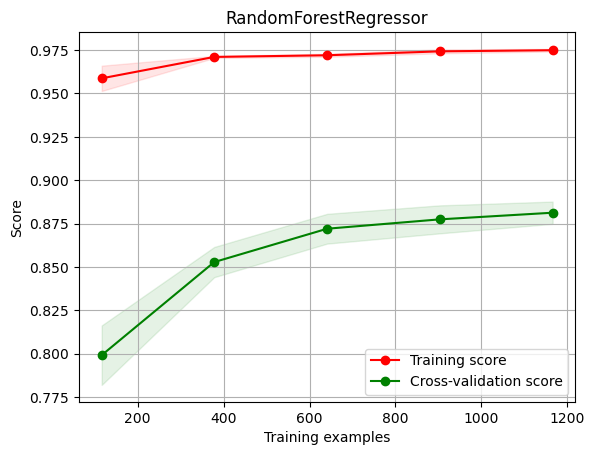

In [87]:
rf_tuned = tune_parameters(rf_pipe, train_complete, y_train, 
                           params['rf'], 10, RandomForestRegressor())

Best Hyperparameters for GradientBoostingRegressor  

{'model__n_estimators': np.int32(1700), 'model__min_samples_split': np.float64(0.7000000000000001), 'model__min_samples_leaf': np.float64(0.1), 'model__learning_rate': 0.1} 

Original RMSE: 0.12091200732173832 

Improved RMSE: 0.1365180395827285 

NEW LEARNING CURVE:


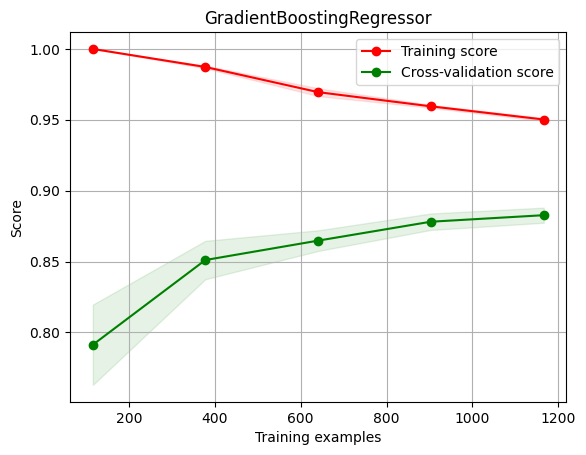

In [90]:
gb_tuned = tune_parameters(gb_pipe, train_complete, y_train, 
                           params['gb'], 10, GradientBoostingRegressor())

It looks like the hyperparameter tuning step did very little generally, or for any model specifically in terms of improving prediction scores. The Bayesian Ridge, Random Forest, and Gradient Boosting models all saw essentially no changes in their training RMSE scores after grid searches for all of them; and the Kernel Ridge model's score even went down noticeably.

While hyperparameter tuning is a powerful and useful process, especially for complex models, it does not always, unambiguously yield more accurate models. This modeling problem appears to be one such case of this. Relatively speaking, there is little training data here to use in model preparation which may have been one reason why hyperparameter tuning didn't lead to significant model improvements. Additionally, the parameter values used in the search may not have been the best values that could have been used. The values used were suggested from various model documentation websites and other tutorials, but other values outside of the selected ranges might have been better suited to this problem.

Since the Bayesian Ridge model technically performed the best on training data (though only slightly better than the Linear Regression model), I'll use this model to make final predictions. Before I do this, I'll fit the tuned model on training data one more time to show the most important features in terms of regression coefficient:

In [96]:
br_final = BayesianRidge(tol = 0.0001, 
                         max_iter = 100, 
                         lambda_2 = 1e-06, 
                         lambda_1 = 1e-06, 
                         alpha_2 = 0.0001, 
                         alpha_1 = 0.0001)

br_final.fit(train_complete, y_train)
feature_importances = pd.DataFrame(columns = ['Variable', 'Coef'])
feature_importances['Variable'] = list(train_complete)
feature_importances['Coef'] = (br_final.coef_)
feature_importances.sort_values(by = 'Coef', ascending = False, inplace = True)
feature_importances.head(20)

,Variable,Coef
83,Neighborhood_Crawfor,0.073807
8,OverallQual,0.053269
25,CentralAir,0.050617
99,Neighborhood_StoneBr,0.047528
148,Exterior1st_BrkFace,0.044513
9,OverallCond,0.042704
66,MSZoning_RL,0.040277
104,Condition1_Norm,0.037747
64,MSZoning_FV,0.034497
223,SaleCondition_Normal,0.030379


Here, we see a list of variables that positively affect predicted Sale Price. It appears that some neighborhoods can get away with selling houses at higher prices, like Crawford and Stoneboork, so these must be the more affluent neighborhoods. Alongside these variables, the _overall quality_ and _central air_ variables have the highest coefficients on sale price. Unfortunately, none of the features I put together in the feature engineering phase are among the most important variables.

Lastly, I'll use the model to predict the sale prices from the test data. Then I'll submit those predictions to Kaggle.

In [99]:
pred = np.expm1(br_final.predict(test_complete))
submission = pd.DataFrame({'Id': test_ID, 'SalePrice': pred})
submission.to_csv("Submission.csv", index = False)

This submission achived a score of about 0.13, which is almost exactly the same as the model's training RMSE. At the time of this writing in early 2025, this score put me at a ranking of 1175 on the leaderboard of over 4,000 submissions, or just shy of the 25th percentile.

## Conclusion:

In this project, I took a simple but thorough approach to predicting house prices on a simple, public dataset. After some cursory EDA, I fit and analyzed several different model types on this data. Ironically, linear regression performed very well relative to other models tested, and still performed well relative to fine-tuned models. I have also shown that, at least for this highly simplified dataset, a fairly accurate prediction of home prices can be made with fairly simple methods.

At the time of this writing, modeling home values has become much more complicated than this very simple dataset alludes, or even than the practice was in 2019. 2019 was years before the sharp increase in home values and interest rates that occurred in 2021 and 2022, meaning this dataset is many years out of date. Additionally, while linear regression is well suited to simple data, home value data is extremely complex in the real world. Though it may not be the most accurate or the most transparent, Zillow's popular "Zestimate" home value predication model is based on a [neural network](https://www.zillow.com/z/zestimate/#:~:text=The%20Zestimate%C2%AE%20home%20valuation,of%20a%20home's%20market%20value.) rather than a linear or other simple model. While this kind of model is extremely complex to build, no one in the real estate spaces doubts Zillow's cultural and social significance as a home value forecaster. This is likely requisite with real world circumstances of home price and related data that need extremely complex methods that can process large amounts of data and scale well